# Kaggle Titanic Project

## Objective
---

You'll be competing in Kaggle's [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic) Competition. You can download the datasets, and read the requirements of the competition using the associated link.<br>

### Requirements
---
* **Submissions:**
    1. Screenshot of conforimation of submission to Kaggle
    2. Your completed notebook, following the associated outline as necessary below.
        * Clearly structure your notebook, try to walk the reader along your experiment by making use           of clean code, efficient use of outputs, effective visualizations, and basic Markdown                 syntax to document your code.

## Example
---
<br>


## Kaggle Titanic Project Submission
#### Dealo Mckellar

### Problem Definition
Clearly and brefiely describe the question you are trying to answer or idea you are exploring.

### Sourcing Data
Quickly describe the content of the data, citing the source, and explaining why you believe this dataset can be used to solve your problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr, norm, normaltest

In [2]:
# Load the data from its source format into a pandas dataframe
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Quick overview of data using pandas methods
df.info()
# 12 columns, 1 is ID which is just the index, survived is the target
# 10 possible features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
[len(df[x].value_counts()) for x in df.columns]
# It'll be tough to use a column that is an object AND has a lot of different values as a feature

[891, 2, 3, 891, 2, 88, 7, 7, 681, 248, 147, 3]

### Exploratory Data Analysis
This area should contain your visualizations as you seek to understand the relationships that exists within the data before running your linear regression algorithm.

Express your curiosities in markdown, followed by your code to create the visualization that explores that curiosity.

In [5]:
df.Survived.mean() # 1 means survived, 0 means dead, this means .38 people survived
# 342/891

0.3838383838383838

In [6]:
df.Survived.sum()

342

In [7]:
df.groupby('Sex').Survived.mean()
# Survival is heavily influenced by gender clearly, females are way more likely to survive
# The test submission where it's assumed that all females live have a .76555 accuracy
# This means that there is a slight difference between the train and test set in terms of survival rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [8]:
Sexdf = pd.DataFrame(df.Sex)
sexmap = {'female':1, 'male':0}
Sexdf.Sex = Sexdf.Sex.map(sexmap)
sum(df.Survived == Sexdf.Sex)/891 # For the train set, if I assume females live and males die, I have a .786 accuracy
# serves a minimum accuracy to aim for in the train set, if I get lower, there's something off

0.7867564534231201

In [9]:
df.groupby('Pclass').Survived.mean() 
# 'lower' number Pclass is more likely to survive
# The difference between female and male is larger than the difference between pclass1 and pclass3

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [10]:
df.groupby(['Pclass','Sex']).Survived.mean() 
# checking to see the whether the above survival rates are influenced by the other feature
# clearly both features are influential
# Females are a lot more likely to survive in pclass 1 or 2 rather than 3
# Males are a lot more likely to survive in pclass 1, rather than 2 or 3

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [11]:
df.groupby('Embarked').Survived.mean()
# The difference is less than sex and pclass

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [12]:
df.groupby(['Sex','Pclass','Embarked']).Survived.mean() 
# Female3S has a lower survival rate than Male1C, that's the only subset where male has higher alive rate than female

Sex     Pclass  Embarked
female  1       C           0.976744
                Q           1.000000
                S           0.958333
        2       C           1.000000
                Q           1.000000
                S           0.910448
        3       C           0.652174
                Q           0.727273
                S           0.375000
male    1       C           0.404762
                Q           0.000000
                S           0.354430
        2       C           0.200000
                Q           0.000000
                S           0.154639
        3       C           0.232558
                Q           0.076923
                S           0.128302
Name: Survived, dtype: float64

In [13]:
df.groupby(['Sex','Pclass','Embarked']).size() 

Sex     Pclass  Embarked
female  1       C            43
                Q             1
                S            48
        2       C             7
                Q             2
                S            67
        3       C            23
                Q            33
                S            88
male    1       C            42
                Q             1
                S            79
        2       C            10
                Q             1
                S            97
        3       C            43
                Q            39
                S           265
dtype: int64

In [14]:
# SibSp = sibling + spouse, Parch = parents + children, I think it's better to combine these 2 values to get family size
df['FamilySize'] = df.SibSp + df.Parch
df.groupby('FamilySize').Survived.mean()

FamilySize
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [15]:
testdf = df.copy()
testdf.FamilySize = testdf['FamilySize'].map(df.groupby('FamilySize').Survived.mean())
testdf.FamilySize = testdf['FamilySize'].apply(lambda x: x - 0.303538) # 0 

testdf.Pclass = testdf['Pclass'].map(df.groupby('Pclass').Survived.mean())
testdf.Pclass = testdf['Pclass'].apply(lambda x: x - 0.242363) # 3

testdf.Sex = testdf['Sex'].map(df.groupby('Sex').Survived.mean())
testdf.Sex = testdf['Sex'].apply(lambda x: x - 0.188908) # male


testdf['Score'] = testdf.FamilySize + testdf.Pclass + testdf.Sex
testdf = testdf.sort_values(by=['Score','Sex'],ascending=[False,False])
testdf = testdf.reset_index(drop=True)

condition = [df.index<342,df.index>=342]
value = [1,0]
testdf['Alive'] = np.select(condition,value)
testdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Score,Alive
0,298,0,3.872666e-01,"Allison, Miss. Helen Loraine",5.531302e-01,2.0,1,2,113781,151.5500,C22 C26,S,0.420600,1.360997,1
1,436,1,3.872666e-01,"Carter, Miss. Lucile Polk",5.531302e-01,14.0,1,2,113760,120.0000,B96 B98,S,0.420600,1.360997,1
2,499,0,3.872666e-01,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",5.531302e-01,25.0,1,2,113781,151.5500,C22 C26,S,0.420600,1.360997,1
3,764,1,3.872666e-01,"Carter, Mrs. William Ernest (Lucile Polk)",5.531302e-01,36.0,1,2,113760,120.0000,B96 B98,S,0.420600,1.360997,1
4,137,1,3.872666e-01,"Newsom, Miss. Helen Monypeny",5.531302e-01,19.0,0,2,11752,26.2833,D47,S,0.274893,1.215290,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,325,0,-4.745418e-07,"Sage, Mr. George John Jr",1.455806e-07,NaN,8,2,CA. 2343,69.5500,NaN,S,-0.303538,-0.303538,0
887,387,0,-4.745418e-07,"Goodwin, Master. Sidney Leonard",1.455806e-07,1.0,5,2,CA 2144,46.9000,NaN,S,-0.303538,-0.303538,0
888,481,0,-4.745418e-07,"Goodwin, Master. Harold Victor",1.455806e-07,9.0,5,2,CA 2144,46.9000,NaN,S,-0.303538,-0.303538,0
889,684,0,-4.745418e-07,"Goodwin, Mr. Charles Edward",1.455806e-07,14.0,5,2,CA 2144,46.9000,NaN,S,-0.303538,-0.303538,0


In [16]:
sum(testdf.Survived == testdf.Alive)/891 # .800 better than .786, good news
# .800 = familysize + pclass + sex (no altering)

0.8002244668911336

In [17]:
testdf = df.copy()
testdf.FamilySize = testdf['FamilySize'].map(df.groupby('FamilySize').Survived.mean())
testdf.Embarked = testdf['Embarked'].map(df.groupby('Embarked').Survived.mean())
testdf.Embarked = testdf['Embarked'].apply(lambda x: x - 0.336957)

testdf.Pclass = testdf['Pclass'].map(df.groupby('Pclass').Survived.mean())
testdf.Sex = testdf['Sex'].map(df.groupby('Sex').Survived.mean())
testdf['Score'] = testdf.FamilySize + testdf.Embarked + testdf.Pclass + testdf.Sex
testdf = testdf.sort_values(by=['Score','Sex'],ascending=[False,False])
testdf = testdf.reset_index(drop=True)

condition = [df.index<342,df.index>=342]
value = [1,0]
testdf['Alive'] = np.select(condition,value)
sum(testdf.Survived == testdf.Alive)/891
# Embarked lowers this score so I won't use it in my final model

0.7890011223344556

In [18]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Fare Distribution')

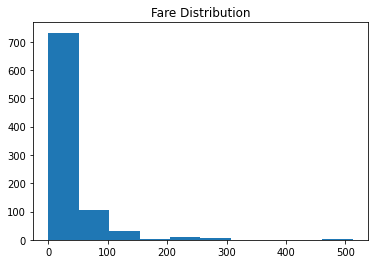

In [19]:
plt.hist(df.Fare) # very skewed to the left
plt.title('Fare Distribution')

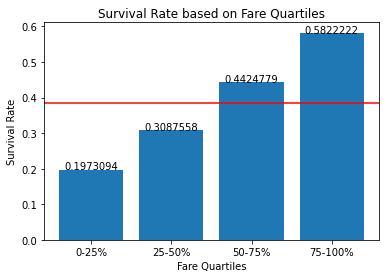

In [20]:
x = ['0-25%','25-50%','50-75%','75-100%']
y = [df[(df.Fare>=0) & (df.Fare<7.910400)].Survived.mean(),df[(df.Fare>=7.910400) & (df.Fare<14.454200)].Survived.mean(),
    df[(df.Fare>=14.454200) & (df.Fare<31.000000)].Survived.mean(),df[(df.Fare>=31.000000) & (df.Fare<99999999)].Survived.mean()]
plt.bar(x,y)
plt.title('Survival Rate based on Fare Quartiles')
plt.xlabel('Fare Quartiles')
plt.ylabel('Survival Rate')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,7)),ha='center')
plt.axhline(342/891,color='r') # survival rate to compare

In [21]:
testdf = df.copy()
testdf.FamilySize = testdf['FamilySize'].map(df.groupby('FamilySize').Survived.mean())
testdf.Pclass = testdf['Pclass'].map(df.groupby('Pclass').Survived.mean())
testdf.Sex = testdf['Sex'].map(df.groupby('Sex').Survived.mean())

condition = [(df.Fare>=0) & (df.Fare<7.910400),(df.Fare>=7.910400) & (df.Fare<14.454200),
(df.Fare>=14.454200) & (df.Fare<31.000000),(df.Fare>=31.000000) & (df.Fare<99999999)]
value = [df[(df.Fare>=0) & (df.Fare<7.910400)].Survived.mean(),df[(df.Fare>=7.910400) & (df.Fare<14.454200)].Survived.mean(),
    df[(df.Fare>=14.454200) & (df.Fare<31.000000)].Survived.mean(),df[(df.Fare>=31.000000) & (df.Fare<99999999)].Survived.mean()]
testdf.Fare = np.select(condition,value)

testdf['Score'] = testdf.FamilySize + testdf.Pclass + testdf.Sex + testdf.Fare
testdf = testdf.sort_values(by=['Score','Sex'],ascending=[False,False])
testdf = testdf.reset_index(drop=True)

condition = [df.index<342,df.index>=342]
value = [1,0]
testdf['Alive'] = np.select(condition,value)
sum(testdf.Survived == testdf.Alive)/891
# Lowers the score of my model so I don't include it in final model

0.7485970819304153

In [22]:
# Getting title from name, the word between the first comma and first period
names = df['Name']
titles = []

for name in names:
    splitted = name.split(',')[1]
    splitted = splitted.split('.')[0]
    titles.append(splitted)
    
titlesrs = pd.Series(titles)
titlesrs.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
dtype: int64

In [23]:
df['Title'] = titlesrs

In [24]:
df.groupby('Title').Survived.mean()

Title
 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.697802
 Mlle            1.000000
 Mme             1.000000
 Mr              0.156673
 Mrs             0.792000
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64

In [25]:
testdf = df.copy()
testdf.FamilySize = testdf['FamilySize'].map(df.groupby('FamilySize').Survived.mean())
testdf.FamilySize = testdf['FamilySize'].apply(lambda x: x - 0.303538) # 0 

testdf.Pclass = testdf['Pclass'].map(df.groupby('Pclass').Survived.mean())
testdf.Pclass = testdf['Pclass'].apply(lambda x: x - 0.242363) # 3

testdf.Sex = testdf['Sex'].map(df.groupby('Sex').Survived.mean())
testdf.Sex = testdf['Sex'].apply(lambda x: x - 0.188908) # male

testdf.Title = testdf['Title'].map(df.groupby('Title').Survived.mean())
testdf.Title = testdf['Title'].apply(lambda x: x - 0.156673) # Mr

testdf['Score'] = testdf.FamilySize + testdf.Pclass + testdf.Sex + testdf.Title
testdf = testdf.sort_values(by=['Score','Sex'],ascending=[False,False])
testdf = testdf.reset_index(drop=True)

condition = [df.index<342,df.index>=342]
value = [1,0]
testdf['Alive'] = np.select(condition,value)
sum(testdf.Survived == testdf.Alive)/891 
# Increases the score so I will include 'title' as a feature in my final model
# Also the subtraction statements don't change the score so I won't use them in the final model.

0.8114478114478114

In [26]:
alivebyage = [df[(df.Age>=x) & (df.Age<x+10)].Survived.mean() for x in range(0,91,10)]

In [27]:
df[(df.Age>=70) & (df.Age<1000)].Survived.mean()

0.14285714285714285

Text(0, 0.5, 'Frequency')

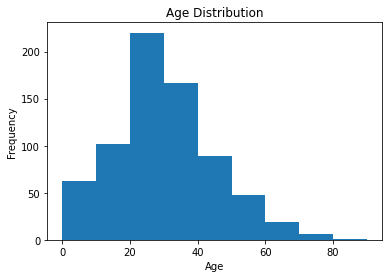

In [28]:
# age distribution
plt.hist(df.Age,bins=range(0,91,10))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

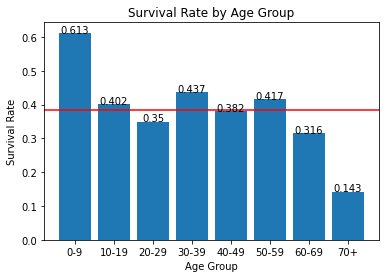

In [29]:
x = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']
y = [alivebyage[0],alivebyage[1],alivebyage[2],alivebyage[3],alivebyage[4],alivebyage[5],alivebyage[6],0.14285714285714285]
plt.bar(x,y)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)),ha='center')
plt.axhline(342/891,color='r') # survival rate to compare


In [30]:
testdf = df.copy()
testdf.FamilySize = testdf['FamilySize'].map(df.groupby('FamilySize').Survived.mean())
testdf.FamilySize = testdf['FamilySize'].apply(lambda x: x - 0.303538) # 0 

testdf.Pclass = testdf['Pclass'].map(df.groupby('Pclass').Survived.mean())
testdf.Pclass = testdf['Pclass'].apply(lambda x: x - 0.242363) # 3

testdf.Sex = testdf['Sex'].map(df.groupby('Sex').Survived.mean())
testdf.Sex = testdf['Sex'].apply(lambda x: x - 0.188908) # male

condition = [(df.Age>=0) & (df.Age<10),(df.Age>=10) & (df.Age<20),(df.Age>=20) & (df.Age<30),(df.Age>=30) & (df.Age<40),(df.Age>=40) & (df.Age<50),
            (df.Age>=50) & (df.Age<60),(df.Age>=60) & (df.Age<70),(df.Age>=70) & (df.Age<1000)]
value = [alivebyage[0],alivebyage[1],alivebyage[2],alivebyage[3],alivebyage[4],alivebyage[5],alivebyage[6],0.14285714285714285]
testdf.Age = np.select(condition,value)
testdf.Age = testdf['Age'].apply(lambda x: x - 0.14285714285714285)

testdf.Title = testdf['Title'].map(df.groupby('Title').Survived.mean())
testdf.Title = testdf['Title'].apply(lambda x: x - 0.156673) # Mr

testdf['Score'] = testdf.FamilySize + testdf.Pclass + testdf.Sex + testdf.Age + testdf.Title
testdf = testdf.sort_values(by=['Score','Sex'],ascending=[False,False])
testdf = testdf.reset_index(drop=True)

condition = [df.index<342,df.index>=342]
value = [1,0]
testdf['Alive'] = np.select(condition,value)
sum(testdf.Survived == testdf.Alive)/891
# 'Age' increases my score so I keep it for the final model

0.8159371492704826

In [31]:
ticketnumdf = df[df['Ticket'].str.isnumeric()==True]
ticketletdf = df[df['Ticket'].str.isnumeric()==False]
print(ticketnumdf.Survived.mean())
print(ticketletdf.Survived.mean())
# Insignificant difference so I won't include ticket as a feature in my final model

0.3842662632375189
0.3826086956521739


**EVERY VISUALIZATION REQUIRES AN ASSOCIATED DECSRIPTION** *(in addition to titles, axis labels, specified units of measurements, and legend if necessary.)*

### Model Evaluation
Using the metrics gathered when training and testing your model, visualize the performance of your model.

In [32]:
subdf = pd.read_csv('test.csv')
subdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
subdf['FamilySize'] = subdf.SibSp + subdf.Parch

names = subdf['Name']
titles = []

for name in names:
    splitted = name.split(',')[1]
    splitted = splitted.split('.')[0]
    titles.append(splitted)
    
titlesrs = pd.Series(titles)
subdf['Title'] = titlesrs


subdf['FamilySize'] = subdf['FamilySize'].map(df.groupby('FamilySize').Survived.mean())
subdf.Pclass = subdf['Pclass'].map(df.groupby('Pclass').Survived.mean())
subdf.Sex = subdf['Sex'].map(df.groupby('Sex').Survived.mean())

condition = [(subdf.Age>=0) & (subdf.Age<10),(subdf.Age>=10) & (subdf.Age<20),(subdf.Age>=20) & (subdf.Age<30),(subdf.Age>=30) & (subdf.Age<40),(subdf.Age>=40) & (subdf.Age<50),
            (subdf.Age>=50) & (subdf.Age<60),(subdf.Age>=60) & (subdf.Age<70),(subdf.Age>=70) & (subdf.Age<1000)]
value = [alivebyage[0],alivebyage[1],alivebyage[2],alivebyage[3],alivebyage[4],alivebyage[5],alivebyage[6],0.14285714285714285]
subdf.Age = np.select(condition,value)
subdf.Title = subdf['Title'].map(df.groupby('Title').Survived.mean())

subdf = subdf.fillna(0) # This didn't change my score

subdf['Score'] = subdf.FamilySize + subdf.Pclass + subdf.Sex + subdf.Age + subdf.Title
subdf = subdf.sort_values(by=['Score','Sex'],ascending=[False,False])
subdf = subdf.reset_index(drop=True)

condition = [subdf.index<158,subdf.index>=158]
value = [1,0]
subdf['Survived'] = np.select(condition,value)
subdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Score,Survived
0,1142,0.472826,"West, Miss. Barbara J",0.742038,0.612903,1,2,C.A. 34651,27.7500,0,S,0.724138,0.697802,3.249708,1
1,1188,0.472826,"Laroche, Miss. Louise",0.742038,0.612903,1,2,SC/Paris 2123,41.5792,0,C,0.724138,0.697802,3.249708,1
2,984,0.629630,"Davidson, Mrs. Thornton (Orian Hays)",0.742038,0.350000,1,2,F.C. 12750,52.0000,B71,S,0.724138,0.792000,3.237806,1
3,1070,0.472826,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",0.742038,0.437126,0,3,230136,39.0000,F4,S,0.724138,0.792000,3.168128,1
4,969,0.629630,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",0.742038,0.416667,2,0,11770,25.7000,C101,S,0.578431,0.792000,3.158766,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1250,0.242363,"O'Keefe, Mr. Patrick",0.188908,0.000000,0,0,368402,7.7500,0,Q,0.303538,0.156673,0.891482,0
414,1272,0.242363,"O'Connor, Mr. Patrick",0.188908,0.000000,0,0,366713,7.7500,0,Q,0.303538,0.156673,0.891482,0
415,1305,0.242363,"Spector, Mr. Woolf",0.188908,0.000000,0,0,A.5. 3236,8.0500,0,S,0.303538,0.156673,0.891482,0
416,1308,0.242363,"Ware, Mr. Frederick",0.188908,0.000000,0,0,359309,8.0500,0,S,0.303538,0.156673,0.891482,0


In [34]:
# 418 * 0.3838383 is 160.4
tocsv = subdf[['PassengerId','Survived']]
tocsv = tocsv.sort_values(by=['PassengerId'],ascending=[True])
#tocsv.to_csv('submission160.csv', index=False, header=True) # score is .77033 (better than .76555)
#tocsv.to_csv('submission159.csv', index=False, header=True) # score is .77272
tocsv.to_csv('submission158.csv', index=False, header=True) # score is .77511, high score
# 157 is .77272 as well 


Provide context to the meaning of your visuals or any performance metrics derived.